

```
Must only be used when activation function is ReLU.
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

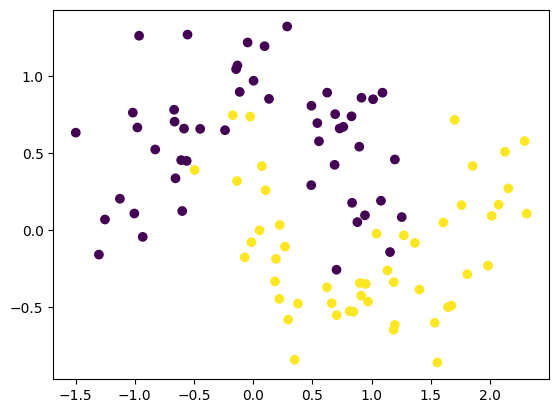

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
from tensorflow.keras.initializers import HeNormal

In [5]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer=HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer=HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer=HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer=HeNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.get_weights()

[array([[ 0.57747746, -0.98440355, -1.1319039 ,  1.5446324 ,  2.0639799 ,
         -1.2463219 , -1.4501123 , -0.45149872, -0.66492164,  0.57323873],
        [-0.5238387 ,  0.15970804, -0.14457092, -0.35844466,  1.2731816 ,
         -1.1064665 ,  1.6430908 , -0.00395669,  0.6914405 , -0.02851667]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.9985263e-03, -2.9071242e-01,  3.2660732e-01,  2.9147717e-01,
         -5.5755872e-01, -2.0044979e-01, -2.3419747e-01, -2.9614741e-01,
          2.0392665e-01,  3.1206864e-01],
        [-3.8055220e-01,  3.4108019e-01, -5.5145556e-01,  3.3381495e-01,
         -5.0705230e-01,  9.1028279e-01,  5.0541854e-01,  2.0344396e-01,
         -6.6383082e-01,  1.1930705e-02],
        [ 5.9182644e-01,  2.4997811e-01,  4.7007162e-02, -3.1566992e-01,
          4.7114083e-01, -4.5833766e-01, -9.5621705e-01,  1.7332539e-01,
          6.2184805e-01, -2.8805128e-01],
        [-1.8645426e-04,  3.8311788e-01, -1.22852

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3656 - loss: 0.8174 - val_accuracy: 0.4500 - val_loss: 0.7447
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3398 - loss: 0.7941 - val_accuracy: 0.4500 - val_loss: 0.7201
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3984 - loss: 0.7592 - val_accuracy: 0.4500 - val_loss: 0.6958
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3688 - loss: 0.7511 - val_accuracy: 0.4000 - val_loss: 0.6734
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3305 - loss: 0.7432 - val_accuracy: 0.5000 - val_loss: 0.6545
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3031 - loss: 0.7240 - val_accuracy: 0.5000 - val_loss: 0.6371
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2977 - loss: 0.7070 - val_accuracy: 0.4500 - val_loss: 0.6209
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3750 - loss: 0.6861 - val_accuracy: 0.4500 - val_loss

In [9]:
model.get_weights()

[array([[ 0.7666253 , -1.0201111 , -1.0945133 ,  1.4289197 ,  2.2044995 ,
         -1.162964  , -1.5984645 , -0.5148937 , -0.6272317 ,  0.69788146],
        [-0.88627833,  0.25284183, -0.08162153, -0.06324655,  1.1706771 ,
         -1.1974593 ,  1.6440799 ,  0.04116846,  0.63791   , -0.30334604]],
       dtype=float32),
 array([ 0.07081088, -0.04412089,  0.09272004,  0.03530444,  0.10314912,
         0.06236213, -0.09322413, -0.05787217, -0.02112952, -0.05095305],
       dtype=float32),
 array([[ 0.00635001, -0.35155812,  0.38946852,  0.54336864, -0.5575587 ,
         -0.34734482, -0.25975537, -0.35809729,  0.55012727,  0.23018706],
        [-0.4087466 ,  0.3999514 , -0.5375345 ,  0.2850155 , -0.548379  ,
          0.9597662 ,  0.54622966,  0.18048267, -0.78941375,  0.06154529],
        [ 0.56316733,  0.31302646,  0.10655032, -0.35848898,  0.47114083,
         -0.40826172, -0.92090493,  0.07071559,  0.52696574, -0.23296732],
        [ 0.00411786,  0.3322134 , -0.10575153, -0.60427326, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 637us/step


<Axes: >

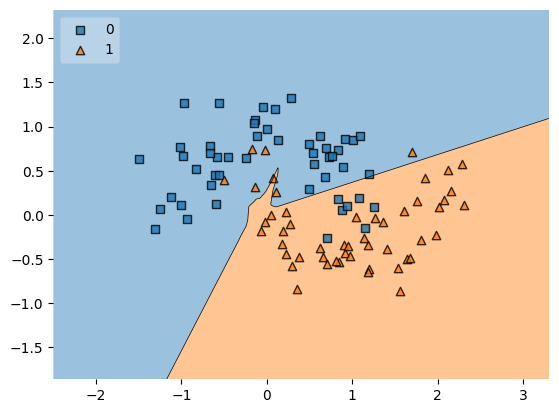

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [11]:
from tensorflow.keras.initializers import HeUniform

In [12]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2,kernel_initializer=HeUniform()))
model2.add(Dense(10,activation='relu',kernel_initializer=HeUniform()))
model2.add(Dense(10,activation='relu',kernel_initializer=HeUniform()))
model2.add(Dense(10,activation='relu',kernel_initializer=HeUniform()))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history2 = model2.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.2992 - loss: 0.7749 - val_accuracy: 0.5500 - val_loss: 0.6912
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3406 - loss: 0.7590 - val_accuracy: 0.5500 - val_loss: 0.6799
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2836 - loss: 0.7499 - val_accuracy: 0.5500 - val_loss: 0.6701
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3773 - loss: 0.7148 - val_accuracy: 0.6000 - val_loss: 0.6603
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3508 - loss: 0.7188 - val_accuracy: 0.6000 - val_loss: 0.6514
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3414 - loss: 0.7162 - val_accuracy: 0.6000 - val_loss: 0.6416
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3992 - loss: 0.6968 - val_accuracy: 0.6000 - val_loss: 0.6306
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4437 - loss: 0.6887 - val_accuracy: 0.6500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 698us/step


<Axes: >

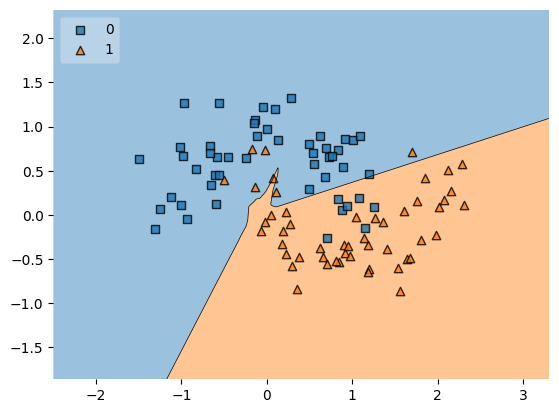

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

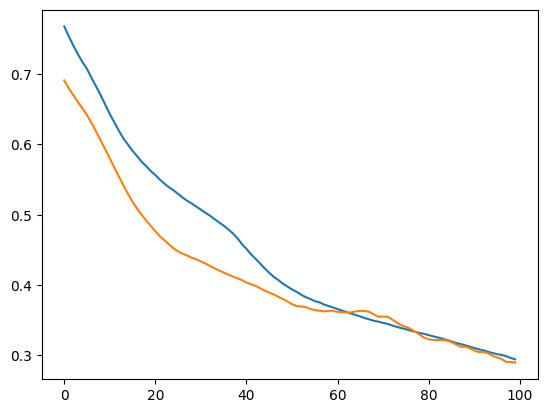

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

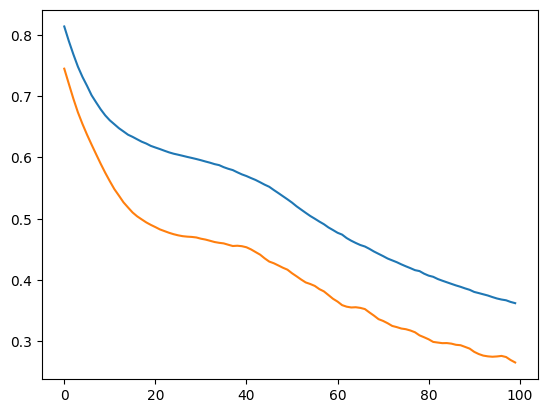

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])